In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_path = '/Users/ameliabaum/Desktop/Amelia/Berkeley Fall 2019/CY PLAN 257/Final Project/data/'


In [21]:
zcode_data = pd.read_csv(data_path+"zip_code_features3.csv").rename({"Unnamed: 0": "zip code"}, axis=1)
# .set_index("zip code")
zcode_data.head()

,zip code,wk_auto_out,wk_transit_out,am_school_out,pm_home_out,total_outb,wk_auto_inb,wk_transit_inb,am_school_inb,active,shopping_wkday,shopping_nwkday,num_am,pm_home_inb,internal,total_inb
0,90001,10,0,0,2,135,6,0,0,32,0,0,12,8,0,180
1,90002,5,0,0,0,47,3,0,0,16,0,0,1,0,0,77
2,90003,5,0,0,1,117,2,0,0,20,1,0,4,2,0,158
3,90004,4,0,1,0,122,0,0,0,53,4,0,8,0,0,156
4,90005,2,0,0,0,93,5,0,0,42,0,0,5,0,0,120


We can see that several the the features have high collinearity. I eliminated the all auto and all transit feature because it had very high collinearity with some other features including any of the features containing transit or auto.total inbound and total oubound have reletively high collinearity with other subsets of inbound/outbound. some of the high collinearities are not easily explained, such as the relationship between "total inbound" and "work auto outbound". Other relationships between inbound and outbound features suggest that inboundna outbound counts are positively correlated, which suggests that zip codes with a lot of inbound trips at one time of day have a lot of outbound trips as well. This makes sense, given that this is daily activity and we would expect most people who enter the zip code for work, school, or other activities will eventually go back home.

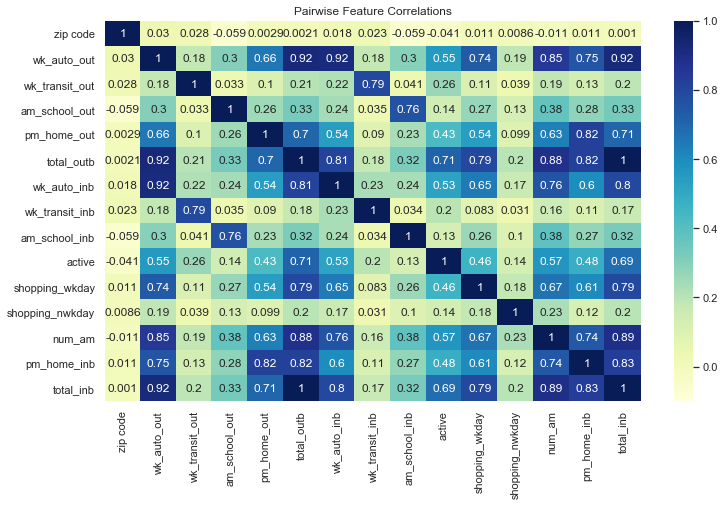

In [23]:
color = sns.diverging_palette(11, 11)
sns.set(font_scale=1)
plt.subplots(figsize=(12,7))
corr = zcode_data[[col for col in zcode_data.columns if col not in ['internal', "zip"]]].corr()
corr.style.set_precision(3)
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmax=1, vmin = -0.1);
sns.axes_style("white");
plt.title("Pairwise Feature Correlations");




In [42]:
features = zcode_data[[col for col in zcode_data.columns if col not in ['internal', "zip code"]]].columns
print("num feats: ", len(features))
features

num feats:  14


Index(['wk_auto_out', 'wk_transit_out', 'am_school_out', 'pm_home_out',
       'total_outb', 'wk_auto_inb', 'wk_transit_inb', 'am_school_inb',
       'active', 'shopping_wkday', 'shopping_nwkday', 'num_am', 'pm_home_inb',
       'total_inb'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = zcode_data.loc[:, features].values
# Separating out the target
y = zcode_data.loc[:,'zip code'].values
# Standardizing the features
standard_data = StandardScaler().fit_transform(x)
standard_data

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[-0.23869716, -0.17514872, -0.3283402 , ...,  0.34696507,
         1.10195672, -0.1250132 ],
       [-0.52091491, -0.17514872, -0.3283402 , ..., -0.71543048,
        -0.70431068, -0.54984567],
       [-0.52091491, -0.17514872, -0.3283402 , ..., -0.42568624,
        -0.25274383, -0.21575412],
       ...,
       [-0.80313265, -0.17514872, -0.3283402 , ..., -0.8120119 ,
        -0.70431068, -0.81794383],
       [-0.69024556, -0.17514872, -0.3283402 , ..., -0.71543048,
        -0.70431068, -0.77257337],
       [ 1.7932706 , -0.17514872, -0.3283402 , ...,  0.73329073,
        -0.0269604 ,  0.81951725]])

In [65]:
n_components = 5
pca_model = PCA(n_components)
principalComponents = pca_model.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["principal component {0}".format(i+1) for i in range(n_components)])

In [66]:
PCs = pca_model.components_
print(len(features))
pc_df = pd.DataFrame(PCs, columns = features)
pc_df.index = np.arange(1,n_components+1)
pc_df
#looks like the first PC is weighting almost all of the feats equally. this might suggest that the bucketing is
#smoothing a lot of variability which ight be informative

14


,wk_auto_out,wk_transit_out,am_school_out,pm_home_out,total_outb,wk_auto_inb,wk_transit_inb,am_school_inb,active,shopping_wkday,shopping_nwkday,num_am,pm_home_inb,total_inb
1,0.348993,0.095951,0.154113,0.282574,0.364016,0.314497,0.087089,0.150702,0.251547,0.296282,0.086927,0.338222,0.314409,0.363075
2,-0.006555,0.638315,-0.269619,-0.072699,-0.006677,0.062912,0.638010,-0.266234,0.141150,-0.068250,-0.039418,-0.043738,-0.065185,-0.017164
3,-0.091470,0.257677,0.620557,-0.110672,-0.090629,-0.087415,0.268349,0.626624,-0.118970,-0.095543,0.078182,0.001842,-0.101902,-0.087124
4,0.001825,-0.017348,-0.055543,-0.181528,0.000522,0.023876,-0.025275,-0.086479,0.045999,0.037339,0.962911,0.033187,-0.152148,-0.003600
5,0.100307,-0.079908,0.035630,-0.625092,0.096293,0.252492,-0.114372,0.068704,0.460441,0.132327,-0.222370,0.046104,-0.464121,0.064954


In [67]:
finalDf = pd.concat([principalDf, zcode_data[['zip code']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,zip code
0,-0.010775,-0.097928,-0.551661,-0.384594,-0.846829,90001
1,-1.786178,0.087439,-0.093412,0.020082,0.265106,90002
2,-1.099017,0.000370,-0.278292,-0.123999,-0.143151,90003
3,-0.649531,-0.411043,0.937445,-0.008076,0.884864,90004
4,-1.373627,0.164396,-0.198769,0.064124,0.621548,90005


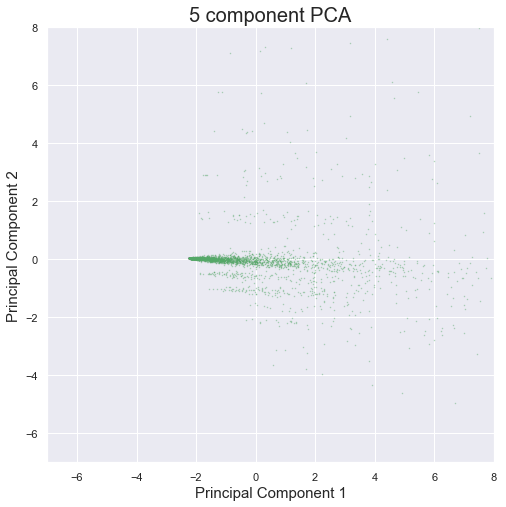

In [68]:
plt.figure(figsize = (8,8))

ax = plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], color='g', alpha=.5, edgecolor='g', s=0.2)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xlim(-7,8)
plt.ylim(-7,8)
plt.title('{0} component PCA'.format(n_components), fontsize = 20)
plt.show()

In [69]:
explained = pca_model.explained_variance_ratio_
explained_sum = np.cumsum(explained)
# eigenvector = np.array(range(1,24))

print(explained_sum)
# print(len(eigenvector))

[0.51469586 0.64184791 0.74759429 0.81683765 0.86335942]


In [70]:
pca_model.explained_variance_ratio_

array([0.51469586, 0.12715205, 0.10574638, 0.06924336, 0.04652177])

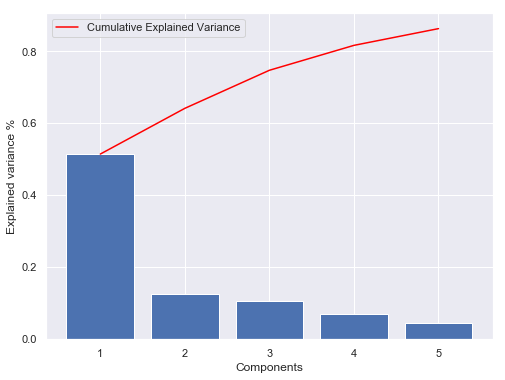

In [71]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca_model.explained_variance_ )+1),pca_model.explained_variance_ratio_ )
plt.ylabel('Explained variance %')
plt.xlabel('Components')
plt.plot(range(1,len(pca_model.explained_variance_ratio_ )+1),
         np.cumsum(pca_model.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

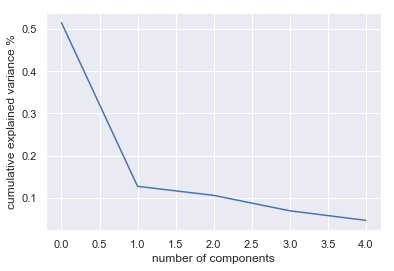

In [72]:
plt.plot(pca_model.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance %')
plt.show()

In [73]:
import plotly.express as px
#projection of the data onto the first 3 PCs, most of the variation is in PC1
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
                   opacity=0.7)
fig.show()

In [74]:
std_data = pd.DataFrame(standard_data, columns=features)
std_data.head()

,wk_auto_out,wk_transit_out,am_school_out,pm_home_out,total_outb,wk_auto_inb,wk_transit_inb,am_school_inb,active,shopping_wkday,shopping_nwkday,num_am,pm_home_inb,total_inb
0,-0.238697,-0.175149,-0.328340,0.421911,-0.186859,-0.428311,-0.159551,-0.322859,0.234293,-0.590004,-0.190595,0.346965,1.101957,-0.125013
1,-0.520915,-0.175149,-0.328340,-0.603607,-0.622723,-0.578277,-0.159551,-0.322859,-0.162535,-0.590004,-0.190595,-0.715430,-0.704311,-0.549846
2,-0.520915,-0.175149,-0.328340,-0.090848,-0.276013,-0.628266,-0.159551,-0.322859,-0.063328,-0.436262,-0.190595,-0.425686,-0.252744,-0.215754
3,-0.577358,-0.175149,1.671998,-0.603607,-0.251248,-0.728244,-0.159551,-0.322859,0.755130,0.024965,-0.190595,-0.039361,-0.704311,-0.224003
4,-0.690246,-0.175149,-0.328340,-0.603607,-0.394885,-0.478300,-0.159551,-0.322859,0.482311,-0.590004,-0.190595,-0.329105,-0.704311,-0.372488


In [61]:
principalComponents

array([[-1.07747204e-02, -9.79278778e-02, -5.51661272e-01, ...,
        -8.46828671e-01,  7.69415350e-01, -3.95035280e-01],
       [-1.78617752e+00,  8.74385276e-02, -9.34116840e-02, ...,
         2.65105677e-01,  1.76946313e-01, -3.60369820e-02],
       [-1.09901668e+00,  3.69575806e-04, -2.78292467e-01, ...,
        -1.43151270e-01,  4.04397906e-01,  7.02689483e-02],
       ...,
       [-2.23377897e+00,  3.39902239e-02,  3.38579246e-02, ...,
        -2.47282822e-02,  5.01280345e-03,  9.03022261e-02],
       [-2.12014490e+00,  3.50172987e-02,  1.07137261e-02, ...,
         2.01728901e-02,  7.77894286e-03,  4.92648295e-02],
       [ 2.17156568e+00, -4.52562266e-03, -1.09347013e+00, ...,
         3.66598717e-01, -8.31307774e-01, -1.37222087e+00]])

Now we can see the weight of each of the features onto each of the principle components. Both visualizations below show this in different ways. The first PC has the most homogeneity because there is some collinarity in the features, and all the PCs after have much more variance in the weights because each of them is orthogonal to one another.

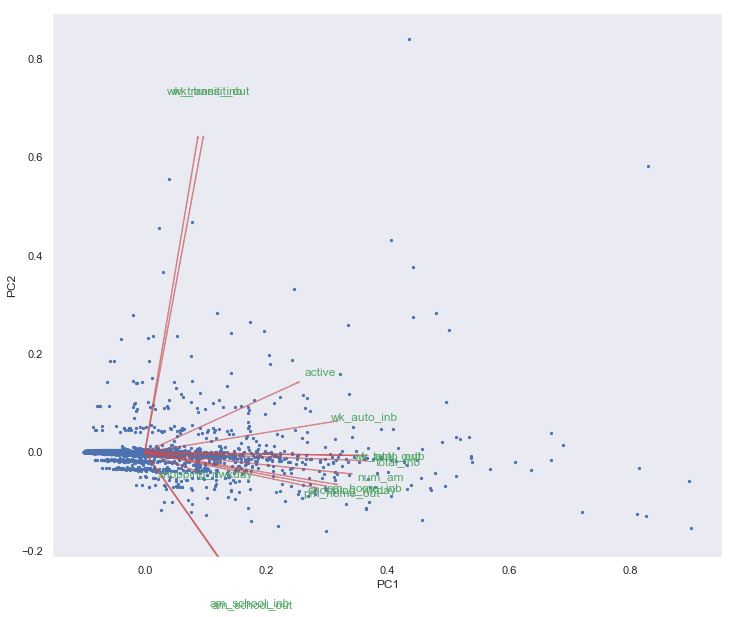

In [62]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(12,10))
myplot(principalComponents[:,0:2],np.transpose(pca_model.components_[0:2, :]),list(std_data.columns))
plt.show()

5

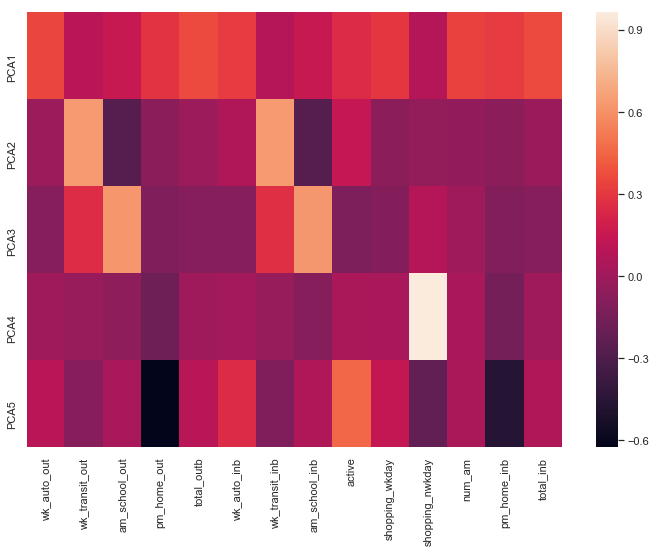

In [75]:
plt.figure(figsize = (12,8))
sns.heatmap(pca_model.components_,
      yticklabels=[ "PCA"+str(x) for x in range(1,pca_model.n_components_+1)],
        xticklabels=list(features) )
pca_model.n_components

#### Interpretation of PCs
PC2 has stronger positive weights on: work transit outbound and inbound, and stronger negative weights on: am school inbound and outbound. There is also a slight positive weights on work auto inbound and active. This might suggest that this is a zip code with a lot of commuters, and not a lot of children/students that were surveyed.

***note*** the fact that this is a survey highly affects the results. When we do a post factor demographic analysis, it will be interesting to see how that lines up with the survey results. We are clustering based on imperfect survey information. 

PC3 has moderate positive weights on am school inbound and outbound, and work transit inbound and outbound. Auto trips are not as heavily weighted here. Active trips are just barely positively weighted. This might suggests that this PC describes zip codes with lower than average car use and maybe better than average transit

PC4 is very uniformly unweighted, except for the non workday shopping feature which is highly positively weighted. This suggests that this PC describes zip codes where there is a lot of retail establishments, where people are making perchases in the evening.

PC5 has strong negative weights on pm home inbound and outbound and the highest positive weight on active mobility trips. there is also a moderately positive weight on work auto inbound trips. this could mean that this zip code is not primarily residential (the lack of inbound home trips and the higher amount of inbound work trips). this also fits with a business district because in more dense locations people might be more likely to walk/bike to destinations close to their office, like to lunch or a quick errand,etc.

